Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns


from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler as ROS

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score 

Reading Data

In [2]:
df = pd.read_csv('../../data_sets/fetal_health.csv')
df.dtypes

print(df.describe())


       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057               

Scaling Data

In [3]:
ss = StandardScaler()

df['fetal_health'].replace({1:0,2:1,3:2}, inplace = True)

unseen_data = df.sample(n=210)
remaining_data = df.drop(unseen_data.index)
unseen_data.reset_index(inplace=True)
remaining_data.reset_index(inplace=True)

remaining_data.drop('index',axis=1, inplace=True)
unseen_data.drop('index',axis=1, inplace=True)

scaled_data = remaining_data.copy()
scaled_data.drop('fetal_health',axis=1,inplace=True)

scaled_data = ss.fit_transform(scaled_data)

scaled_data = pd.DataFrame(scaled_data , columns = df.drop('fetal_health',axis=1).columns)
scaled_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.347481,-0.826050,-0.202794,-1.487939,-0.634205,-0.060554,-0.272984,1.508856,-0.941444,1.779768,...,-0.162317,-1.068699,-2.128439,-0.705559,-0.459004,-1.045110,0.159481,-1.167168,1.831666,1.117265
1,-0.130620,0.729186,-0.202794,0.553028,0.382930,-0.060554,-0.272984,-1.751722,0.864734,-0.535150,...,1.539102,-0.865890,1.913609,0.651040,0.975664,0.224394,0.095662,0.141089,-0.235879,-0.509391
2,-0.130620,0.988392,-0.202794,1.233351,-0.634205,-0.060554,-0.272984,-1.809947,1.203392,-0.535150,...,1.203974,-1.372912,0.341701,1.668488,-0.459004,-0.017416,0.095662,0.003378,-0.269774,1.117265
3,0.072190,-0.566844,-0.202794,1.913673,2.417200,-0.060554,3.058464,-1.227701,5.154406,-0.535150,...,2.054683,-1.474316,2.025888,0.311890,3.844999,-3.705024,-1.755092,-2.131148,5.119401,-0.509391
4,0.072190,-0.566844,-0.202794,2.934157,2.078155,-0.060554,4.724189,-1.053027,5.605950,-0.535150,...,2.054683,-1.474316,2.025888,0.651040,3.844999,-4.007287,-1.755092,-2.200003,6.644639,-0.509391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,0.680621,-0.826050,-0.202794,0.893190,-0.634205,-0.060554,-0.272984,1.858204,-1.280103,0.810732,...,-0.781014,1.466413,0.734678,-0.027259,-0.459004,0.949825,0.989130,0.967357,-0.574821,-0.509391
1912,0.680621,-0.566844,-0.202794,0.893190,-0.634205,-0.060554,-0.272984,1.799980,-1.054330,0.649227,...,-0.110758,0.317162,0.285562,0.651040,-0.459004,0.889372,0.861491,0.898502,-0.540927,1.117265
1913,0.680621,-0.566844,-0.202794,0.893190,-0.634205,-0.060554,-0.272984,1.858204,-1.054330,0.541556,...,-0.084979,0.317162,0.341701,0.311890,-0.459004,0.949825,0.861491,0.967357,-0.507033,1.117265
1914,0.680621,-0.566844,-0.202794,0.553028,-0.634205,-0.060554,-0.272984,1.799980,-1.054330,0.918403,...,-0.110758,0.317162,0.285562,0.651040,-0.459004,0.889372,0.797672,0.898502,-0.507033,1.117265


Training

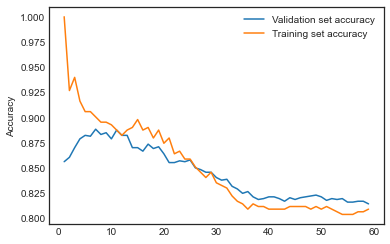

In [4]:
target = remaining_data['fetal_health']
predictors = scaled_data.copy()

x_train, x_rest, y_train, y_rest = train_test_split(predictors,target, train_size=0.20,random_state= 42,stratify = target.values)
x_validate, x_test, y_validate, y_test = train_test_split(x_rest, y_rest, test_size=0.25, random_state=45)

neighbors = np.arange(1,60)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(x_train, y_train)

    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_validate, y_validate)

plt.plot(neighbors, test_accuracy)
plt.plot(neighbors ,train_accuracy)

plt.legend(['Validation set accuracy','Training set accuracy'])
plt.ylabel('Accuracy')
plt.show()

In [5]:
#Split for validation --> train, val, test = 80/15/5

x_train, x_validation, y_train, y_validation = train_test_split(df.drop('fetal_health', axis=1), df['fetal_health'], test_size=0.20, random_state=33)

x_val, x_test, y_val, y_test = train_test_split(x_validation, y_validation, test_size=0.25, random_state=33)

print("x_train shape is:",x_train.shape)
print("y_train shape is:",y_train.shape, "\n")
print("x_val shape is:",x_val.shape)
print("y_val shape is:",y_val.shape, "\n")
print("x_test shape is:",x_test.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (1700, 21)
y_train shape is: (1700,) 

x_val shape is: (319, 21)
y_val shape is: (319,) 

x_test shape is: (107, 21)
y_test shape is: (107,)


KNN Model

Training accuracy: 0.9005882352941177
KNN scores
0.8691588785046729
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93        83
         1.0       0.78      0.41      0.54        17
         2.0       0.83      0.71      0.77         7

    accuracy                           0.87       107
   macro avg       0.83      0.70      0.74       107
weighted avg       0.86      0.87      0.85       107

Confusion matrix:
[[81  2  0]
 [ 9  7  1]
 [ 2  0  5]]


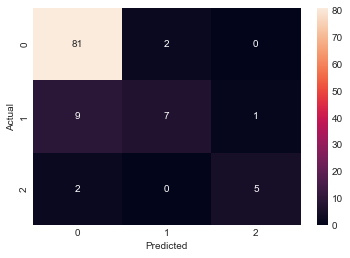

In [6]:
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
model = {"KNN" : KNeighborsClassifier(10)}
for test, clf in model.items():

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    print('Training accuracy:',train_acc)
    print( test + ' scores')
    print(acc)
    print(classification_report(y_test,y_pred))
    print('Confusion matrix:')
    print(confusion_matrix(y_test,y_pred))
    confusion = sns.heatmap(confusion_matrix(y_test, y_pred),annot = True)
    confusion.set_xlabel("Predicted")
    confusion.set_ylabel("Actual")
    model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)